# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
%matplotlib inline
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [3]:
tweet_dogs = pd.read_csv('twitter-archive-enhanced.csv')
tweet_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open('image-predictions.tsv',mode = 'wb') as file:
    file.write(response.content)

In [6]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [55]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_dogs.tweet_id

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_dogs.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
df_list=[]
with open('tweet-json.txt','r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        tweet_id = tweet_line['id']
        retweet_cnt = tweet_line['retweet_count']
        fav_cnt = tweet_line['favorite_count']
        follow_cnt = tweet_line['user']['followers_count']
        friends_cnt = tweet_line['user']['friends_count']
        df_list.append({'id':tweet_id,
                       'retweet_count':retweet_cnt,
                       'favorite_count':fav_cnt,
                       'followers_count':follow_cnt,
                       'friends_count':friends_cnt})
json_tweet = pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count','followers_count','friends_count'])

In [8]:
json_tweet.info()
json_tweet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                 2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
json_tweet.info()
json_tweet.head()
json_tweet.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                 2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


id                 2354
retweet_count      1724
favorite_count     2007
followers_count      66
friends_count         1
dtype: int64

In [57]:
tweet_dogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
222,849668094696017920,NaN,NaN,2017-04-05 17:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gidget. She's a spy pup...,8.331247e+17,4.196984e+09,2017-02-19 01:23:00 +0000,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,None,None,pupper,None
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,None,None,None,None
1329,705898680587526145,NaN,NaN,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705898680...,10,10,Max,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
829,768909767477751808,NaN,NaN,2016-08-25 20:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None


- rating_denominator should not be greater than 10

In [10]:
tweet_dogs['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
tweet_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality issues
1. Nulls represented as None in the dog stage category columns in tweet_dogs

2. Missing values from the in_reply_to status, in_reply_to user_id columns

3. Timestamp column not in datetime format 

4. Tweet Id is int format rather than a string in tweet-dogs dataframe

5. retweeted status_id, retweeted_status_user_id,retweeted_status_timestamp, are retweeted values and won't be used in the analysis

6. retweeted status_id, retweeted_status_user_id,retweeted_status_timestamp & expanded urls have missing values

7. Follower_count & Friend_count in Json_tweets have repetitve values

8. Tweet_Id column in image-predictions is an int64 rather than a string

9. The Id column in json_tweets is the same asa tweet_Id in other dataframes

10. Tweet_Id column in json-tweets is an int64 rather than a string

### Tidiness issues
1. Having the dog stage(4 variables in 4 columns) rather than one column in tweet_dogs

2. Merge all 3 tables (tweet_dogs, image_predictions, json_tweets)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
tweet_dogs_clean = tweet_dogs.copy()
image_predictions_clean = image_predictions.copy()
json_tweet_clean = json_tweet.copy()

### Issue 1:

It was stated that only original tweets are required for the analysis, therefore retweeted status_id, retweeted_status_user_id & retweeted_status_timestamp are retweeted values and won't be used in the analysis

#### Define:
Drop the tweet_Id that contain retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### Code:

In [17]:
tweet_dogs_clean= tweet_dogs_clean[tweet_dogs_clean['retweeted_status_id'].isnull()]
tweet_dogs_clean= tweet_dogs_clean[tweet_dogs_clean['retweeted_status_user_id'].isnull()]
tweet_dogs_clean= tweet_dogs_clean[tweet_dogs_clean['retweeted_status_timestamp'].isnull()]


#### Test:

In [18]:
tweet_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue 2:

Missing values in the in_reply_to_status_id & in_reply_to_user_id

#### Define:
Drop both in_reply_to_user_id & in_reply_to_status_id along with the other retweeted colums as these wouldn't be used for analysis

#### Code:

In [19]:
#Drop all the columns 'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id','retweeted_status_id'
d_list=['in_reply_to_user_id', 'in_reply_to_status_id','retweeted_status_timestamp',
        'retweeted_status_user_id', 'retweeted_status_id','expanded_urls']
tweet_dogs_clean.drop(d_list, axis=1, inplace=True)


#### Test:

In [102]:
tweet_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue 3:

The Tweet_id is in an int format(should be a string format column) in tweet_dogs dataframe

#### Define:
Convert the tweet_id colum from int_64 into string format

#### Code:

In [20]:
tweet_dogs_clean['tweet_id'] = tweet_dogs_clean['tweet_id'].astype(str)

### Issue 4:
The timestamp column is not in a datetime format

#### Define:
Convert the timestamp column into a datetime format in the tweet_dogs dataframe

In [21]:
tweet_dogs_clean['timestamp']= pd.to_datetime(tweet_dogs_clean['timestamp'])

In [109]:
tweet_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


### Issue 5:
Nulls represented as None in the dog stage category columns in tweet_dogs

#### Define:
The dog stage columns are filled with the value of 'None' rather than empty null values.

#### Code:

In [22]:
tweet_dogs_clean['doggo'].replace('None','',inplace=True)
tweet_dogs_clean['floofer'].replace('None','',inplace=True)
tweet_dogs_clean['pupper'].replace('None','',inplace=True)
tweet_dogs_clean['puppo'].replace('None','',inplace=True)


#### Test

In [26]:
tweet_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


### Issue 6:
Having the dog stage(4 variables in 4 columns) rather than one column in tweet_dogs

#### Define:
The various dog stages puppo,pupper,floofer,doggo having different columns can be represented in one stage column. The blank spaces should be replaced with Nan(Null) Values

#### Code:

In [23]:
# Combine the various columns into one stage column
tweet_dogs_clean['stage'] =  tweet_dogs_clean['doggo'] + tweet_dogs_clean['floofer'] + tweet_dogs_clean['pupper'] + tweet_dogs_clean['puppo']


In [24]:
tweet_dogs_clean.drop(['doggo','floofer', 'pupper', 'puppo'],axis=1,inplace=True)

In [25]:
tweet_dogs_clean['stage']=tweet_dogs_clean['stage'].replace('',np.nan)

#### Test:

In [40]:
tweet_dogs_clean.stage.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: stage, dtype: int64

In [39]:
tweet_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 344 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 232.9+ KB


### Issue 7:
Follower_count & Friend_count in Json_tweets have repetitve values.

#### Define:
Follower_count & Friend_count in Json_tweets have repetitve values. This dataframe is to be merged with tweet_dogs_clean


#### Code:

In [26]:
json_tweet_clean.drop(['friends_count','followers_count'],axis=1, inplace=True)

#### Test:

In [49]:
json_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Issue 8:
The id column in json_tweet is the same as tweet_id in the other dataframes

#### Define:
The id column in json_tweet is the same as tweet_id in the other dataframes. This should be changed.

#### Code:

In [27]:
json_tweet_clean.rename(columns={'id':'tweet_id'},inplace=True)


#### Test:

In [13]:
json_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


## Issue 9:
Tweet_Id column in json-tweets is an int64 rather than a string

#### Define:
Tweet_Id column in json-tweets is an int64 rather than a string format. Using astype to make the conversion

#### Code:

In [28]:
json_tweet_clean['tweet_id'] = json_tweet_clean['tweet_id'].astype(str)

#### Test:

In [52]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Issue 10:
Tweet_Id column in image-predictions is an int64 rather than a string

#### Define:
Tweet_Id column in image-predictions is an int64 type rather than a string type

#### Code:

In [29]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test:

In [54]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Issue 11:
Merge all 3 tables (tweet_dogs_clean, image_predictions_clean, json_tweets_clean)

#### Define:
For easier analysis the 3 dataframes provided should be merged into 1 DataFrame.

#### Code:

In [31]:
combined_data = tweet_dogs_clean.merge(json_tweet_clean, on = 'tweet_id').merge(image_predictions_clean,on='tweet_id')

#### Test:

In [32]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 306 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [2]:
combined_data.to_csv('twitter_archive_master',index=False)

NameError: name 'combined_data' is not defined

In [2]:
data = pd.read_csv('twitter_archive_master')

In [38]:
data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [3]:
data = pd.read_csv('twitter_archive_master')
data.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,12.280843,10.532096,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,41.497718,7.320710,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,10.000000,10.000000,624.750000,1982.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,7.084748e+17,11.000000,10.000000,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,12.000000,10.000000,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 306 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool


In [8]:
data['name'].value_counts()/data.shape[0] * 100

None            27.382146
a                2.758275
Charlie          0.551655
Cooper           0.501505
Oliver           0.501505
Lucy             0.501505
Penny            0.451354
Tucker           0.451354
Sadie            0.401204
Winston          0.401204
Toby             0.351053
the              0.351053
Daisy            0.351053
Lola             0.351053
an               0.300903
Jax              0.300903
Stanley          0.300903
Bo               0.300903
Koda             0.300903
Bella            0.300903
Leo              0.250752
Buddy            0.250752
Chester          0.250752
Milo             0.250752
Rusty            0.250752
Oscar            0.250752
Scout            0.250752
Louis            0.250752
Dave             0.250752
Bailey           0.250752
                  ...    
Sweet            0.050150
Sandra           0.050150
Jareld           0.050150
Gustav           0.050150
Bronte           0.050150
Erik             0.050150
Raphael          0.050150
Fido        

In [30]:
data['p1'].value_counts().head()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
Name: p1, dtype: int64

### Insights:
1. The average numerator rating is at 12.28


2. Dogs with no names contribute to over 27% 


3. The top 3 dog types are the Golden retriever, Lambrador retriver and Pembroke

### Visualization

##### This scatterplot shows the correlation between twitter users favoriting a tweet and retweeting.

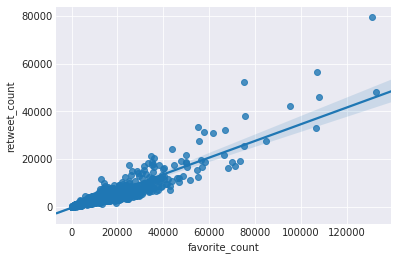

In [27]:
# Showing the relation between favorite_count and retweet_counts
sns.set_style('darkgrid')
ax= sns.regplot(x='favorite_count',y='retweet_count',data=data)

##### This piechart show the top 5 most common breeds of dogs posted.

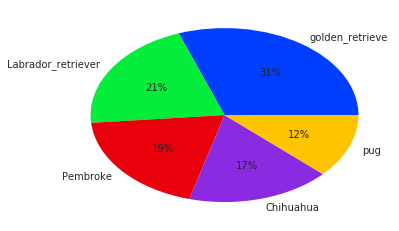

In [37]:
# Showing the top 5 most common dogs
dog_types=['golden_retrieve', 'Labrador_retriever','Pembroke','Chihuahua','pug']
color_ = sns.color_palette('bright')
plt.pie(data['p1'].value_counts().head(),labels=dog_types,colors=color_,autopct='%.0f%%')
plt.show()


##### This shows the distribution of the top 3 Dog stages 

Text(0.5,1,'The Distribution of Dog Stages')

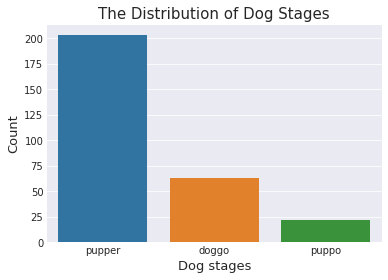

In [53]:
#Showing the most common dog stages
sns.set_style('darkgrid')
stage_count=data['stage'].value_counts().head(3).index
ax = sns.countplot(data=data,x='stage', order= stage_count)

plt.xlabel('Dog stages', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('The Distribution of Dog Stages', fontsize=15)